<a href="https://colab.research.google.com/github/arhamshah/Attendance-Face-Detection/blob/master/healthPlanRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Health Plan Recommendation System


### Importing necessary libraries and setting up dataframe

In [ ]:
import pandas as pd
import sklearn
from bs4 import BeautifulSoup
import re
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/drugsComTrain_raw.csv', on_bad_lines='skip')
df.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
df.condition.value_counts()

Birth Control                                              28788
Depression                                                  9069
Pain                                                        6145
Anxiety                                                     5904
Acne                                                        5588
                                                           ...  
Dissociative Identity Disorde                                  1
Hydrocephalus                                                  1
Hyperlipoproteinemia Type III, Elevated beta-VLDL   IDL        1
Q Feve                                                         1
Neutropenia                                                    1
Name: condition, Length: 884, dtype: int64

In [ ]:
df_train = df[(df['condition']=='Anxiety') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [ ]:
df_train = df_train.reset_index(drop=True)
X = df_train.drop(['drugName','rating','date','usefulCount'],axis=1)

In [ ]:
X

,uniqueID,condition,review
0,75612,Depression,"""I have taken anti-depressants for years, with..."
1,96233,Depression,"""1 week on Zoloft for anxiety and mood swings...."
2,121333,Depression,"""my gp started me on Venlafaxine yesterday to ..."
3,156544,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l..."
4,131704,Anxiety,"""Was on this med for 5 years. Worked fine but ..."
...,...,...,...
19843,176146,Anxiety,"""About 4 years ago I started having early-morn..."
19844,86533,"Diabetes, Type 2","""I just got diagnosed with type 2. My doctor p..."
19845,93069,Depression,"""This is the third med I&#039;ve tried for anx..."
19846,132177,Anxiety,"""I was super against taking medication. I&#039..."


## Data Pre-processing

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords = stopwords.words('english')


from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def clean_review(review):

    review = BeautifulSoup(review, 'html.parser').get_text()
    # remove all the characters except alphabets
    review = re.sub('[^a-zA-Z]', ' ', review)
    # convert to lowercase
    review = review.lower().split()
    # remove stopwords
    review = [w for w in review if not w in stopwords]
    # apply lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in review]

    return( ' '.join(lemmitize_words))

In [ ]:
X['review'] = X['review'].apply(clean_review)

<ipython-input-8-d36fea9783db>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review = BeautifulSoup(review, 'html.parser').get_text()


In [ ]:
X

,uniqueID,condition,review
0,75612,Depression,taken anti depressant year improvement mostly ...
1,96233,Depression,week zoloft anxiety mood swing take mg morning...
2,121333,Depression,gp started venlafaxine yesterday help depressi...
3,156544,"Diabetes, Type 2",hey guy month since last post wanted give mont...
4,131704,Anxiety,med year worked fine great stopped panic attac...
...,...,...,...
19843,176146,Anxiety,year ago started early morning awakening insom...
19844,86533,"Diabetes, Type 2",got diagnosed type doctor prescribed invokana ...
19845,93069,Depression,third med tried anxiety mild depression week h...
19846,132177,Anxiety,super taking medication started dealing anxiet...


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X['review'], X['condition'],stratify=X['condition'],test_size=0.2, random_state=0)

In [ ]:
print(y_train.value_counts())

Depression             7255
Anxiety                4723
Diabetes, Type 2       2043
High Blood Pressure    1857
Name: condition, dtype: int64


In [ ]:
print(y_test.value_counts())

Depression             1814
Anxiety                1181
Diabetes, Type 2        511
High Blood Pressure     464
Name: condition, dtype: int64


## Data Visualization

Text(0.5, 1.0, 'Word cloud for Diabetes')

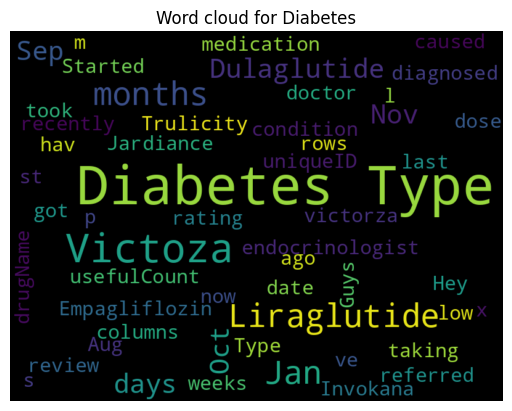

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df[(df['condition']=='Diabetes, Type 2')]
wc = WordCloud(max_words = 500 , width = 800 , height = 600).generate(str(text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.title('Word cloud for Diabetes')

Text(0.5, 1.0, 'Word cloud for Depression')

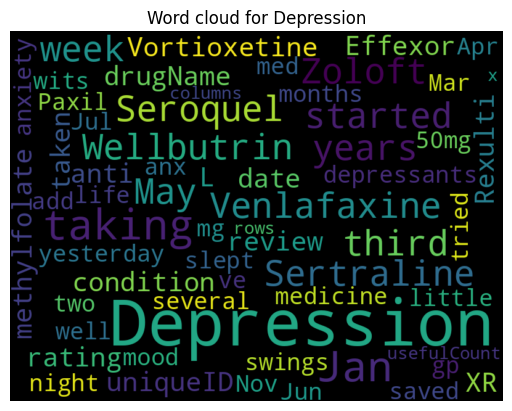

In [ ]:
text = df[(df['condition']=='Depression')]
wc = WordCloud(max_words = 500 , width = 800 , height = 600).generate(str(text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.title('Word cloud for Depression')

Text(0.5, 1.0, 'Word cloud for Anxiety')

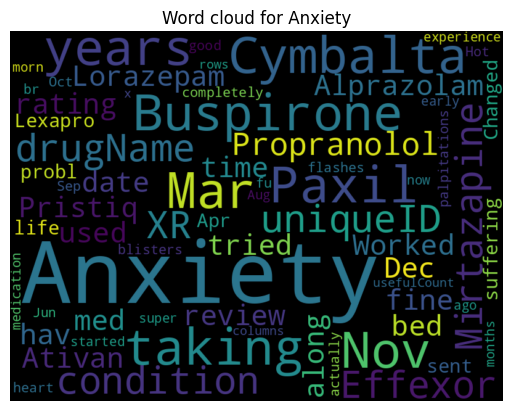

In [ ]:
text = df[(df['condition']=='Anxiety')]
wc = WordCloud(max_words = 500 , width = 800 , height = 600).generate(str(text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.title('Word cloud for Anxiety')

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

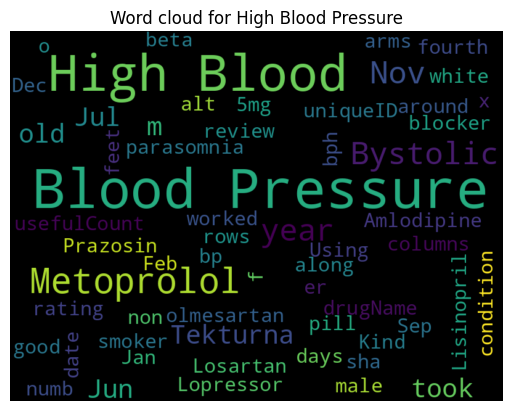

In [ ]:
text = df[(df['condition']=='High Blood Pressure')]
wc = WordCloud(max_words = 500 , width = 800 , height = 600).generate(str(text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.title('Word cloud for High Blood Pressure')

## Fitting the models

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')
X_train = count_vectorizer.fit_transform(X_train)
X_test = count_vectorizer.transform(X_test)

In [ ]:
# Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

model = MultinomialNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("Accuracy: ", score)

Accuracy:  0.8483627204030226


In [ ]:
# Passive Aggressive Classifier

from sklearn.linear_model import PassiveAggressiveClassifier

model = PassiveAggressiveClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("Accuracy: ", score)

Accuracy:  0.8657430730478589


In [ ]:
# TF-IDF with 3 n-grams

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
tfpred = pass_tf.predict(tfidf_test)
score = accuracy_score(y_test, tfpred)
print("Accuracy: ", score)

Accuracy:  0.9115869017632242


## Sample Predictions

In [ ]:
input_text = ["Sometimes I crave sugar so much that if I dont get it, I go nuts!"]
tfidf_input = tfidf_vectorizer.transform(input_text)
sample = pass_tf.predict(tfidf_input)
print(sample)

['Diabetes, Type 2']


In [ ]:
input_text = ["I fear heights. So I am afraid of roller coaster."]
tfidf_input = tfidf_vectorizer.transform(input_text)
sample = pass_tf.predict(tfidf_input)
print(sample)

['Anxiety']


In [ ]:
input_text = ["I get severe headaches and often faint"]
tfidf_input = tfidf_vectorizer.transform(input_text)
sample = pass_tf.predict(tfidf_input)
print(sample)

['High Blood Pressure']


In [ ]:
input_text = ["I do drugs when I feel nervous, scared, lonely!"]
tfidf_input = tfidf_vectorizer.transform(input_text)
sample = pass_tf.predict(tfidf_input)
print(sample)

['Depression']


## Plotting precision-recall curve

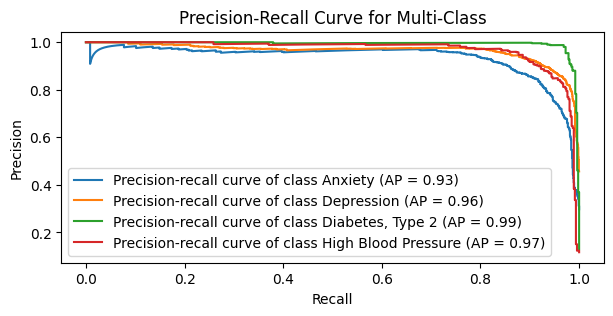

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt


y_test_bin = label_binarize(y_test, classes=pass_tf.classes_)
classifier = OneVsRestClassifier(PassiveAggressiveClassifier())
classifier.fit(tfidf_train, y_train)
y_score = classifier.decision_function(tfidf_test)
precision = dict()
recall = dict()
average_precision = dict()

for i in range(len(pass_tf.classes_)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

plt.figure(figsize=(7, 3))

for i in range(len(pass_tf.classes_)):
    plt.plot(recall[i], precision[i], label=f'Precision-recall curve of class {pass_tf.classes_[i]} (AP = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi-Class')
plt.legend()
plt.show()

# Future Scope: After recognizing the disease, we would be using GPT-2 to developed a healthplan. Due to time constraint we couldn't develop the text generation model.

